# **Import Libraries & Dataset**

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data.csv", encoding="latin1",low_memory=False)
x = df["no2"].dropna().values

# **Transformation**

In [10]:
r = 102303250
ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

# Non-linear transformation
z = x + ar * np.sin(br * x)

print(f"Calculated ar: {ar}")
print(f"Calculated br: {br}")

Calculated ar: 0.0
Calculated br: 0.3


# **Parameter Estimation (MLE)**

In [11]:
mu = np.mean(z)
sigma2 = np.var(z)
lam = 1 / (2 * sigma2)
c = 1 / np.sqrt(2 * np.pi * sigma2)

print(f"mu: {mu:.6f}")
print(f"lambda: {lam:.6f}")
print(f"c: {c:.6f}")

mu: 25.809623
lambda: 0.001460
c: 0.021561


# **Visualization**

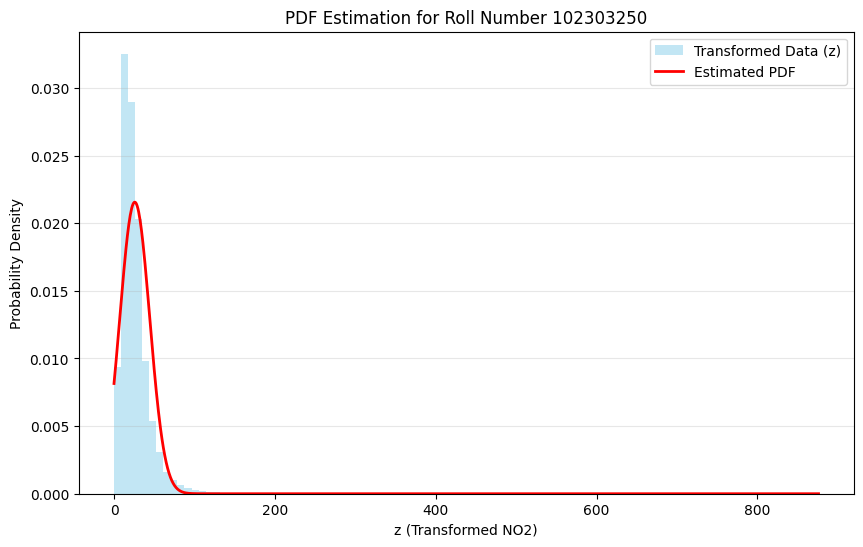

In [12]:
z_grid = np.linspace(z.min(), z.max(), 1000)
pdf_fitted = c * np.exp(-lam * (z_grid - mu)**2)

plt.figure(figsize=(10, 6))
plt.hist(z, bins=100, density=True, alpha=0.5, color='skyblue', label="Transformed Data (z)")
plt.plot(z_grid, pdf_fitted, color='red', lw=2, label="Estimated PDF")
plt.title(f"PDF Estimation for Roll Number {r}")
plt.xlabel("z (Transformed NO2)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()